In [56]:

import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import kruskal
import math

pd.set_option ('display.max_columns', None)

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold, train_test_split

from sklearn.preprocessing import normalize, LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [57]:
df = pd.read_csv(r"C:\Users\QB183AP\OneDrive - EY\Documents\Machine Learning\client_attrition_train.csv")
print(df.shape)
df.head(20)

(10127, 21)


,customer_id,customer_age,customer_sex,customer_number_of_dependents,customer_education,customer_civil_status,customer_salary_range,customer_relationship_length,customer_available_credit_limit,credit_card_classification,total_products,period_inactive,contacts_in_last_year,credit_card_debt_balance,remaining_credit_limit,transaction_amount_ratio,total_transaction_amount,total_transaction_count,transaction_count_ratio,average_utilization,account_status
0,755410,38.00,F,2,High School,Married,40-60K,31,1593.00,Blue,4,2,4,1091,502.00,0.87,4136.00,67,0.72,0.69,open
1,568093,46.00,F,2,Graduate,Unknown,below 40K,40,6568.00,Blue,5,2,2,0,6568.00,0.10,1507.00,33,0.22,0.00,closed
2,595389,43.00,M,1,High School,Married,80-120K,30,34516.00,Silver,1,1,3,2045,32471.00,0.59,4081.00,54,0.42,0.06,open
3,287252,46.00,F,4,High School,Married,below 40K,36,2374.00,Blue,5,2,1,1332,1042.00,0.69,4253.00,81,0.88,0.56,open
4,231901,40.00,M,4,High School,Single,80-120K,29,12978.00,Blue,3,3,2,0,12978.00,0.63,14134.00,85,0.70,0.00,open
5,418821,51.00,M,4,High School,Married,80-120K,42,14438.00,Blue,6,1,2,2517,11921.00,0.85,2090.00,47,0.88,0.17,open
6,896187,45.00,F,3,Uneducated,Single,below 40K,39,2551.00,Blue,5,4,1,2253,298.00,0.69,NaN,63,0.91,0.88,open
7,258495,50.00,F,1,High School,Single,below 40K,36,4517.00,Blue,1,1,3,2238,2279.00,0.62,4686.00,81,0.76,0.49,open
8,881720,45.00,F,5,Unknown,Married,Unknown,40,14728.00,Blue,3,2,2,0,14728.00,0.71,4660.00,85,0.73,0.00,open
9,367251,40.00,F,2,Graduate,Unknown,below 40K,29,2636.00,Blue,5,1,2,1953,683.00,0.92,4584.00,70,0.59,0.74,open


In [58]:
missing_percentages = df.isnull().sum()/len(df)
missing_percentages[missing_percentages>0]

customer_age               0.06
customer_sex               0.10
customer_salary_range      0.07
total_transaction_amount   0.04
dtype: float64

In [59]:
# check missing values in train data
df.isnull().sum()

customer_id                           0
customer_age                        624
customer_sex                       1018
customer_number_of_dependents         0
customer_education                    0
customer_civil_status                 0
customer_salary_range               681
customer_relationship_length          0
customer_available_credit_limit       0
credit_card_classification            0
total_products                        0
period_inactive                       0
contacts_in_last_year                 0
credit_card_debt_balance              0
remaining_credit_limit                0
transaction_amount_ratio              0
total_transaction_amount            407
total_transaction_count               0
transaction_count_ratio               0
average_utilization                   0
account_status                        0
dtype: int64

In [60]:
df[df["customer_salary_range"].isna()]

,customer_id,customer_age,customer_sex,customer_number_of_dependents,customer_education,customer_civil_status,customer_salary_range,customer_relationship_length,customer_available_credit_limit,credit_card_classification,total_products,period_inactive,contacts_in_last_year,credit_card_debt_balance,remaining_credit_limit,transaction_amount_ratio,total_transaction_amount,total_transaction_count,transaction_count_ratio,average_utilization,account_status
16,847194,55.00,F,3,Uneducated,Divorced,NaN,36,2111.00,Blue,3,2,1,1209,902.00,0.59,2803.00,61,0.60,0.57,open
23,779861,58.00,F,1,Unknown,Single,NaN,50,8513.00,Blue,5,2,2,799,7714.00,0.45,2119.00,37,0.54,0.09,closed
29,881372,NaN,F,4,Uneducated,Single,NaN,21,34516.00,Silver,3,1,2,907,33609.00,0.57,2298.00,55,0.72,0.03,open
59,460434,43.00,M,3,Graduate,Married,NaN,33,3498.00,Blue,4,1,2,0,3498.00,1.11,2512.00,56,0.87,0.00,open
77,632556,55.00,M,3,Graduate,Married,NaN,49,5668.00,Blue,3,1,4,2517,3151.00,0.70,3382.00,56,0.93,0.44,open
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10020,268869,32.00,F,0,Unknown,Divorced,NaN,36,1732.00,Blue,6,3,3,0,1732.00,0.68,2479.00,43,0.54,0.00,closed
10049,923923,44.00,M,2,Graduate,Married,NaN,36,5950.00,Blue,5,6,1,1117,4833.00,0.57,4682.00,89,0.68,0.19,open
10072,318286,53.00,F,2,College,Single,NaN,49,10195.00,Blue,2,2,4,0,10195.00,0.63,2489.00,54,0.39,0.00,closed
10093,507397,41.00,F,4,Graduate,Divorced,NaN,37,7492.00,Blue,5,1,4,1399,6093.00,0.53,3668.00,67,0.68,0.19,open


In [61]:
df["customer_sex"] = df["customer_sex"].fillna(df["customer_sex"].mode().iloc[0])

In [62]:
df["customer_salary_range"] = df["customer_salary_range"].fillna(df["customer_salary_range"].mode().iloc[0])

In [63]:
df["customer_salary_range"].mode().iloc[0]

'below 40K'

In [64]:
df.drop(["customer_id"], axis=1, inplace=True)

count   9503.00
mean      46.32
std        8.00
min       26.00
10%       36.00
25%       41.00
50%       46.00
75%       52.00
90%       57.00
99%       65.00
max       73.00
Name: customer_age, dtype: float64


C:\Users\QB183AP\AppData\Local\Temp\ipykernel_15924\178331184.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['customer_age'], color='g', bins=100, hist_kws={'alpha': 0.4});


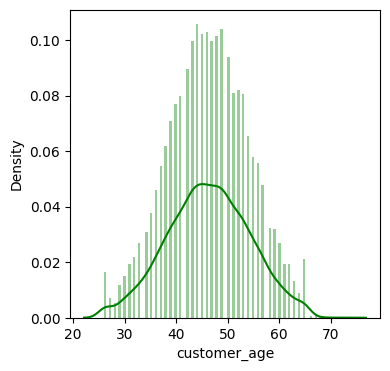

In [65]:
print(df['customer_age'].describe(percentiles=[0.1, 0.25, 0.50, 0.75, 0.90, 0.99]))
plt.figure(figsize=(4, 4))
sns.distplot(df['customer_age'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [66]:
df["customer_age"] = df["customer_age"].fillna(df["customer_age"].mean())

count     9720.00
mean      5253.71
std       7402.26
min        510.00
10%       1514.00
25%       2196.00
50%       3971.00
75%       4823.00
90%      10201.50
99%      31174.36
max     117159.00
Name: total_transaction_amount, dtype: float64


C:\Users\QB183AP\AppData\Local\Temp\ipykernel_15924\1264325383.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_transaction_amount'], color='g', bins=100, hist_kws={'alpha': 0.4})


<Axes: xlabel='total_transaction_amount', ylabel='Density'>

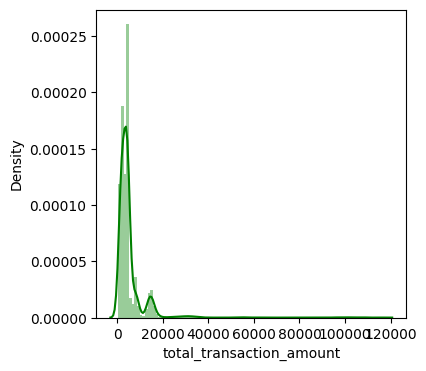

In [67]:
print(df['total_transaction_amount'].describe(percentiles=[0.1, 0.25, 0.50, 0.75, 0.90, 0.99]))
plt.figure(figsize=(4, 4))
sns.distplot(df['total_transaction_amount'], color='g', bins=100, hist_kws={'alpha': 0.4})

In [68]:
print(df["total_transaction_amount"].mode().iloc[0])
print(df["total_transaction_amount"].median())
print(df["total_transaction_amount"].mean())

4253.0
3971.0
5253.711934156378


In [69]:
df["total_transaction_amount"] = df["total_transaction_amount"].fillna(df["total_transaction_amount"].median())

In [70]:
df.isna().sum()

customer_age                       0
customer_sex                       0
customer_number_of_dependents      0
customer_education                 0
customer_civil_status              0
customer_salary_range              0
customer_relationship_length       0
customer_available_credit_limit    0
credit_card_classification         0
total_products                     0
period_inactive                    0
contacts_in_last_year              0
credit_card_debt_balance           0
remaining_credit_limit             0
transaction_amount_ratio           0
total_transaction_amount           0
total_transaction_count            0
transaction_count_ratio            0
average_utilization                0
account_status                     0
dtype: int64

In [71]:
df.head()

,customer_age,customer_sex,customer_number_of_dependents,customer_education,customer_civil_status,customer_salary_range,customer_relationship_length,customer_available_credit_limit,credit_card_classification,total_products,period_inactive,contacts_in_last_year,credit_card_debt_balance,remaining_credit_limit,transaction_amount_ratio,total_transaction_amount,total_transaction_count,transaction_count_ratio,average_utilization,account_status
0,38.00,F,2,High School,Married,40-60K,31,1593.00,Blue,4,2,4,1091,502.00,0.87,4136.00,67,0.72,0.69,open
1,46.00,F,2,Graduate,Unknown,below 40K,40,6568.00,Blue,5,2,2,0,6568.00,0.10,1507.00,33,0.22,0.00,closed
2,43.00,M,1,High School,Married,80-120K,30,34516.00,Silver,1,1,3,2045,32471.00,0.59,4081.00,54,0.42,0.06,open
3,46.00,F,4,High School,Married,below 40K,36,2374.00,Blue,5,2,1,1332,1042.00,0.69,4253.00,81,0.88,0.56,open
4,40.00,M,4,High School,Single,80-120K,29,12978.00,Blue,3,3,2,0,12978.00,0.63,14134.00,85,0.70,0.00,open


In [72]:
columns_to_encode = ['customer_sex', 'customer_education', 'customer_civil_status', 'customer_salary_range', 'credit_card_classification']

for i in columns_to_encode:
    print(df[i].value_counts())

F    5856
M    4271
Name: customer_sex, dtype: int64
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: customer_education, dtype: int64
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: customer_civil_status, dtype: int64
below 40K        4008
40-60K           1666
80-120K          1436
60-80K           1302
Unknown          1030
120K and more     685
Name: customer_salary_range, dtype: int64
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: credit_card_classification, dtype: int64


In [73]:
# Perform one-hot encoding
df_ohe = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

# Print the encoded dataframe
df_ohe.head()

,customer_age,customer_number_of_dependents,customer_relationship_length,customer_available_credit_limit,total_products,period_inactive,contacts_in_last_year,credit_card_debt_balance,remaining_credit_limit,transaction_amount_ratio,total_transaction_amount,total_transaction_count,transaction_count_ratio,average_utilization,account_status,customer_sex_M,customer_education_Doctorate,customer_education_Graduate,customer_education_High School,customer_education_Post-Graduate,customer_education_Uneducated,customer_education_Unknown,customer_civil_status_Married,customer_civil_status_Single,customer_civil_status_Unknown,customer_salary_range_40-60K,customer_salary_range_60-80K,customer_salary_range_80-120K,customer_salary_range_Unknown,customer_salary_range_below 40K,credit_card_classification_Gold,credit_card_classification_Platinum,credit_card_classification_Silver
0,38.00,2,31,1593.00,4,2,4,1091,502.00,0.87,4136.00,67,0.72,0.69,open,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1,46.00,2,40,6568.00,5,2,2,0,6568.00,0.10,1507.00,33,0.22,0.00,closed,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,43.00,1,30,34516.00,1,1,3,2045,32471.00,0.59,4081.00,54,0.42,0.06,open,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3,46.00,4,36,2374.00,5,2,1,1332,1042.00,0.69,4253.00,81,0.88,0.56,open,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,40.00,4,29,12978.00,3,3,2,0,12978.00,0.63,14134.00,85,0.70,0.00,open,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [74]:
df_ohe["account_status"].replace({"closed":1, 'open':0}, inplace=True)

In [75]:
df_ohe.head()

,customer_age,customer_number_of_dependents,customer_relationship_length,customer_available_credit_limit,total_products,period_inactive,contacts_in_last_year,credit_card_debt_balance,remaining_credit_limit,transaction_amount_ratio,total_transaction_amount,total_transaction_count,transaction_count_ratio,average_utilization,account_status,customer_sex_M,customer_education_Doctorate,customer_education_Graduate,customer_education_High School,customer_education_Post-Graduate,customer_education_Uneducated,customer_education_Unknown,customer_civil_status_Married,customer_civil_status_Single,customer_civil_status_Unknown,customer_salary_range_40-60K,customer_salary_range_60-80K,customer_salary_range_80-120K,customer_salary_range_Unknown,customer_salary_range_below 40K,credit_card_classification_Gold,credit_card_classification_Platinum,credit_card_classification_Silver
0,38.00,2,31,1593.00,4,2,4,1091,502.00,0.87,4136.00,67,0.72,0.69,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1,46.00,2,40,6568.00,5,2,2,0,6568.00,0.10,1507.00,33,0.22,0.00,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,43.00,1,30,34516.00,1,1,3,2045,32471.00,0.59,4081.00,54,0.42,0.06,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3,46.00,4,36,2374.00,5,2,1,1332,1042.00,0.69,4253.00,81,0.88,0.56,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,40.00,4,29,12978.00,3,3,2,0,12978.00,0.63,14134.00,85,0.70,0.00,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [76]:
columns_to_scale = ['customer_age', 'customer_number_of_dependents', 'customer_relationship_length', 'customer_available_credit_limit', 'credit_card_debt_balance', 'remaining_credit_limit',
                     'total_transaction_amount', 'total_transaction_count', 'average_utilization', 'period_inactive', 'contacts_in_last_year']
df1 = df_ohe.copy()
 
# Create a scaler object
scaler = StandardScaler()

# Perform feature scaling
df_scaled = pd.DataFrame(scaler.fit_transform(df1[columns_to_scale]), columns=columns_to_scale)

# Replace the scaled columns in the original dataframe
df1[columns_to_scale] = df_scaled

# Print the scaled dataframe
df1.head()

,customer_age,customer_number_of_dependents,customer_relationship_length,customer_available_credit_limit,total_products,period_inactive,contacts_in_last_year,credit_card_debt_balance,remaining_credit_limit,transaction_amount_ratio,total_transaction_amount,total_transaction_count,transaction_count_ratio,average_utilization,account_status,customer_sex_M,customer_education_Doctorate,customer_education_Graduate,customer_education_High School,customer_education_Post-Graduate,customer_education_Uneducated,customer_education_Unknown,customer_civil_status_Married,customer_civil_status_Single,customer_civil_status_Unknown,customer_salary_range_40-60K,customer_salary_range_60-80K,customer_salary_range_80-120K,customer_salary_range_Unknown,customer_salary_range_below 40K,credit_card_classification_Gold,credit_card_classification_Platinum,credit_card_classification_Silver
0,-1.07,-0.27,-0.62,-0.48,4,-0.34,1.40,-0.09,-0.77,0.87,-0.15,0.09,0.72,1.49,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1,-0.04,-0.27,0.51,-0.20,5,-0.34,-0.41,-1.43,-0.10,0.10,-0.51,-1.36,0.22,-1.00,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,-0.43,-1.04,-0.74,1.39,1,-1.33,0.49,1.08,2.75,0.59,-0.15,-0.46,0.42,-0.78,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3,-0.04,1.27,0.01,-0.43,5,-0.34,-1.32,0.21,-0.71,0.69,-0.13,0.69,0.88,1.04,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,-0.82,1.27,-0.87,0.17,3,0.65,-0.41,-1.43,0.61,0.63,1.23,0.86,0.70,-1.00,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [77]:
print("Find most important features relative to Attrition-target")
corr = df1.corr()
corr.sort_values(["account_status"], ascending = False, inplace = True)
print(corr.account_status)

Find most important features relative to Attrition-target
account_status                         1.00
contacts_in_last_year                  0.20
period_inactive                        0.15
customer_education_Doctorate           0.03
customer_salary_range_below 40K        0.02
customer_civil_status_Single           0.02
customer_number_of_dependents          0.02
customer_age                           0.02
customer_relationship_length           0.01
customer_education_Post-Graduate       0.01
credit_card_classification_Platinum    0.01
customer_education_Unknown             0.01
customer_civil_status_Unknown          0.01
customer_salary_range_Unknown          0.01
credit_card_classification_Gold        0.01
remaining_credit_limit                -0.00
customer_education_Uneducated         -0.00
customer_salary_range_80-120K         -0.01
credit_card_classification_Silver     -0.01
customer_education_Graduate           -0.01
customer_education_High School        -0.01
customer_salary_ra

In [78]:
df1.head()

,customer_age,customer_number_of_dependents,customer_relationship_length,customer_available_credit_limit,total_products,period_inactive,contacts_in_last_year,credit_card_debt_balance,remaining_credit_limit,transaction_amount_ratio,total_transaction_amount,total_transaction_count,transaction_count_ratio,average_utilization,account_status,customer_sex_M,customer_education_Doctorate,customer_education_Graduate,customer_education_High School,customer_education_Post-Graduate,customer_education_Uneducated,customer_education_Unknown,customer_civil_status_Married,customer_civil_status_Single,customer_civil_status_Unknown,customer_salary_range_40-60K,customer_salary_range_60-80K,customer_salary_range_80-120K,customer_salary_range_Unknown,customer_salary_range_below 40K,credit_card_classification_Gold,credit_card_classification_Platinum,credit_card_classification_Silver
0,-1.07,-0.27,-0.62,-0.48,4,-0.34,1.40,-0.09,-0.77,0.87,-0.15,0.09,0.72,1.49,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1,-0.04,-0.27,0.51,-0.20,5,-0.34,-0.41,-1.43,-0.10,0.10,-0.51,-1.36,0.22,-1.00,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,-0.43,-1.04,-0.74,1.39,1,-1.33,0.49,1.08,2.75,0.59,-0.15,-0.46,0.42,-0.78,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3,-0.04,1.27,0.01,-0.43,5,-0.34,-1.32,0.21,-0.71,0.69,-0.13,0.69,0.88,1.04,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,-0.82,1.27,-0.87,0.17,3,0.65,-0.41,-1.43,0.61,0.63,1.23,0.86,0.70,-1.00,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0


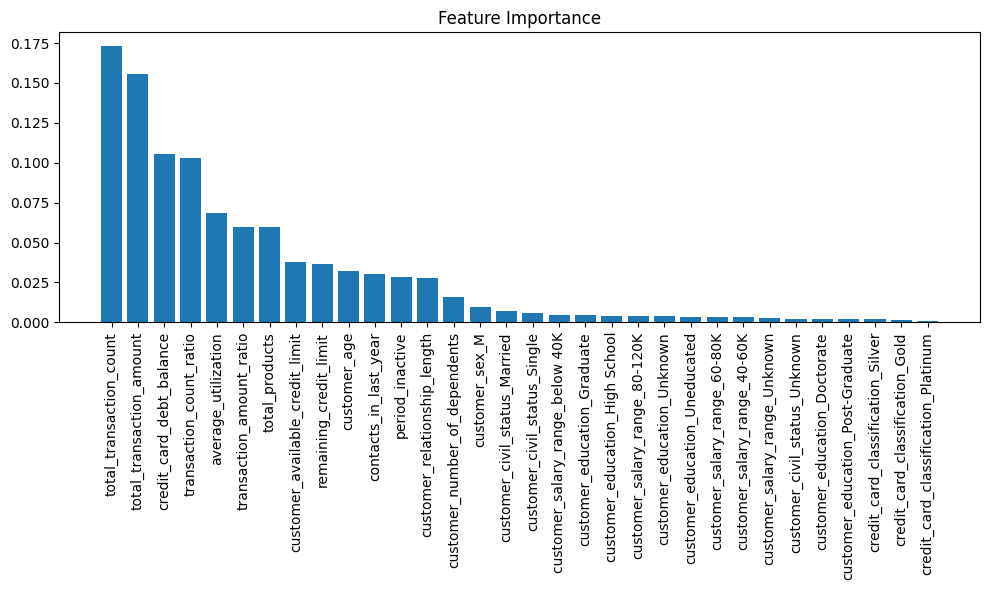

In [79]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming 'df_ohe' is your dataset dataframe
# 'X' is the input features dataframe (excluding the target variable)
# 'y' is the target variable (account_status)

# Create a random forest classifier object
rf = RandomForestClassifier()

X=df1.drop(columns=['account_status'])
y=df1['account_status']

# Fit the classifier on the data
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Get the column names of the input features
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

feature_importance_df = pd.DataFrame({'Feature': feature_names[indices], 'Importance': importances[indices]})

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()



In [80]:
feature_importance_df

,Feature,Importance
0,total_transaction_count,0.17
1,total_transaction_amount,0.16
2,credit_card_debt_balance,0.11
3,transaction_count_ratio,0.10
4,average_utilization,0.07
5,transaction_amount_ratio,0.06
6,total_products,0.06
7,customer_available_credit_limit,0.04
8,remaining_credit_limit,0.04
9,customer_age,0.03


In [81]:
feature_importance_df["Feature"].unique()

array(['total_transaction_count', 'total_transaction_amount',
       'credit_card_debt_balance', 'transaction_count_ratio',
       'average_utilization', 'transaction_amount_ratio',
       'total_products', 'customer_available_credit_limit',
       'remaining_credit_limit', 'customer_age', 'contacts_in_last_year',
       'period_inactive', 'customer_relationship_length',
       'customer_number_of_dependents', 'customer_sex_M',
       'customer_civil_status_Married', 'customer_civil_status_Single',
       'customer_salary_range_below 40K', 'customer_education_Graduate',
       'customer_education_High School', 'customer_salary_range_80-120K',
       'customer_education_Unknown', 'customer_education_Uneducated',
       'customer_salary_range_60-80K', 'customer_salary_range_40-60K',
       'customer_salary_range_Unknown', 'customer_civil_status_Unknown',
       'customer_education_Doctorate', 'customer_education_Post-Graduate',
       'credit_card_classification_Silver',
       'credit_c

In [82]:
df1["account_status"].value_counts()

0    8500
1    1627
Name: account_status, dtype: int64

In [83]:
df_rfe=df1.copy()
df_rfe=df_rfe[['total_transaction_count', 'total_transaction_amount', 'credit_card_debt_balance', 'transaction_count_ratio', 'average_utilization', 'transaction_amount_ratio',
      'total_products', 'remaining_credit_limit', 'customer_available_credit_limit', 'contacts_in_last_year', 'customer_age', 'period_inactive', 'customer_relationship_length', 'customer_number_of_dependents', 
     'customer_sex_M', 'customer_civil_status_Married', 'customer_civil_status_Single', 'customer_salary_range_below 40K', "account_status"]]

In [84]:
from collections import Counter
#from imblearn.over_sampling import ADASYN
#from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from numpy import where
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble  import ExtraTreesClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error
#from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from sklearn.metrics import balanced_accuracy_score

In [85]:
'''
df_rfe=df1.copy()
df_rfe=df_rfe[['total_transaction_amount', 'total_transaction_count',
       'credit_card_debt_balance', 'transaction_count_ratio',
       'transaction_amount_ratio', 'average_utilization',
       'total_products', 'remaining_credit_limit',
       'customer_available_credit_limit', 'customer_age',
       'contacts_in_last_year', 'customer_relationship_length',
       'period_inactive', 'customer_number_of_dependents',
       'customer_sex_M', 'customer_civil_status_Married',
       'customer_civil_status_Single', "customer_salary_range_below 40K", "account_status"]]
       '''

'\ndf_rfe=df1.copy()\ndf_rfe=df_rfe[[\'total_transaction_amount\', \'total_transaction_count\',\n       \'credit_card_debt_balance\', \'transaction_count_ratio\',\n       \'transaction_amount_ratio\', \'average_utilization\',\n       \'total_products\', \'remaining_credit_limit\',\n       \'customer_available_credit_limit\', \'customer_age\',\n       \'contacts_in_last_year\', \'customer_relationship_length\',\n       \'period_inactive\', \'customer_number_of_dependents\',\n       \'customer_sex_M\', \'customer_civil_status_Married\',\n       \'customer_civil_status_Single\', "customer_salary_range_below 40K", "account_status"]]\n       '

In [86]:
from collections import Counter
#from imblearn.over_sampling import ADASYN
#from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from numpy import where
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble  import ExtraTreesClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error
#from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from sklearn.metrics import balanced_accuracy_score

In [87]:
def Definedata():
    # define dataset
    X=df_rfe.drop(columns=['account_status']).values
    y=df_rfe['account_status'].values
    return X, y

In [88]:
from sklearn.metrics import classification_report
def Models_NO(models, graph):
    
    model = models
    X, y = Definedata()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_total = model.predict(X)
    
    if graph:
        train_matrix = pd.crosstab(y_train, model.predict(X_train), rownames=['Actual'], colnames=['Predicted'])    
        test_matrix = pd.crosstab(y_test, model.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
        matrix = pd.crosstab(y, model.predict(X), rownames=['Actual'], colnames=['Predicted'])
    
        f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True, figsize=(15, 2))
    
        g1 = sns.heatmap(train_matrix, annot=True, fmt=".1f", cbar=False,annot_kws={"size": 18},ax=ax1)
        g1.set_title("{}/train set".format(model))
        g1.set_ylabel('Total Churn = {}'.format(1- y_train.sum()), fontsize=14, rotation=90)
        g1.set_xlabel('Accuracy for TrainSet: {}'.format(accuracy_score(model.predict(X_train), y_train)))
        g1.set_xticklabels(['Churn','Not Churn'],fontsize=12)

        g2 = sns.heatmap(test_matrix, annot=True, fmt=".1f",cbar=False,annot_kws={"size": 18},ax=ax2)
        g2.set_title("{}/test set".format(model))
        g2.set_ylabel('Total Churn = {}'.format(1- y_test.sum()), fontsize=14, rotation=90)
        g2.set_xlabel('Accuracy for TestSet: {}'.format(accuracy_score(y_pred, y_test)))
        g2.set_xticklabels(['Churn','Not Churn'],fontsize=12)

        g3 = sns.heatmap(matrix, annot=True, fmt=".1f",cbar=False,annot_kws={"size": 18},ax=ax3)
        g3.set_title("{}/total set".format(model))
        g3.set_ylabel('Total Churn = {}'.format(1- y.sum()), fontsize=14, rotation=90)
        g3.set_xlabel('Accuracy for TotalSet: {}'.format(accuracy_score(y_total, y)))
        g3.set_xticklabels(['Churn','Not Churn'],fontsize=12)
    
        plt.show()
        print ("")
        print ("Classification Report: ")
        print (classification_report(y, y_total))
    else:
        print("\t\tError Table")
        print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, (y_pred)))
        print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, (y_pred) ))
        print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, (y_pred) )))
        print('Accuracy on Traing set   : ', model.score(X_train,y_train))
        print('Accuracy on Testing set  : ', model.score(X_test,y_test))
        print('AUC score                :', roc_auc_score(y, y_total)*100,'%')        
    return y_total, y

In [89]:
np.random.seed(42)

		Error Table
Mean Absolute Error      :  0.06373429084380611
Mean Squared  Error      :  0.06373429084380611
Root Mean Squared  Error :  0.2524565127775596
Accuracy on Traing set   :  1.0
Accuracy on Testing set  :  0.5267031733704961
AUC score                : 96.33670053147259 %


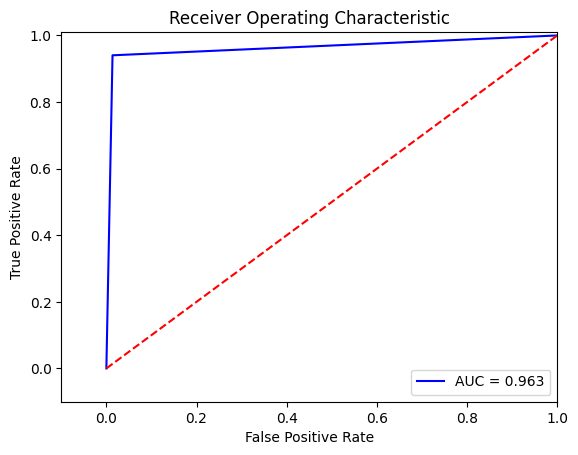

In [90]:
from sklearn.metrics import confusion_matrix,auc,roc_curve
np.random.seed(42)
y_predicted, y_actual = Models_NO(DecisionTreeRegressor(), False)
fpr, tpr, thresholds = roc_curve(y_actual, y_predicted)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

SMOTE sampling

In [91]:
def SMOTE():
    # borderline-SMOTE for imbalanced dataset
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from sklearn.datasets import make_classification
    from imblearn.over_sampling import SMOTE
    from matplotlib import pyplot
    from numpy import where
    
    X, y = Definedata()

# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    smt = SMOTE(random_state=0)
    X, y = smt.fit_resample(X,y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
# scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.show()
    return X_train, X_test, y_train, y_test

In [92]:
def ADASYN():
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import ADASYN
    from matplotlib import pyplot
    from numpy import where

    X, y = Definedata()
    np.random.seed(42)
# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    X, y = ADASYN().fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)
# summarize the new class distribution
    counter = Counter(y)
    print(counter)
# scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(y == label)[0]
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    pyplot.legend()
    pyplot.show()
    return X_train, X_test, y_train, y_test

Counter({0: 8500, 1: 1627})
Counter({0: 8500, 1: 8500})


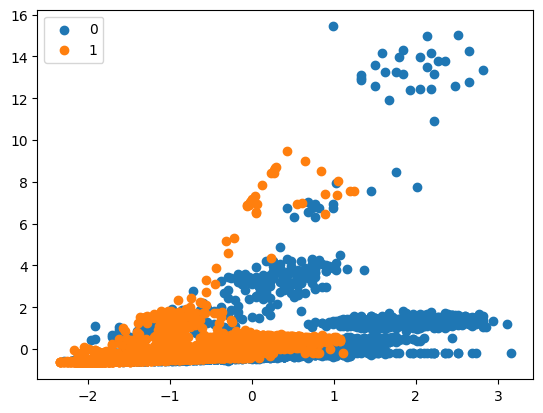

CPU times: total: 1.2 s
Wall time: 413 ms
Counter({0: 8500, 1: 1627})
Counter({1: 8829, 0: 8500})


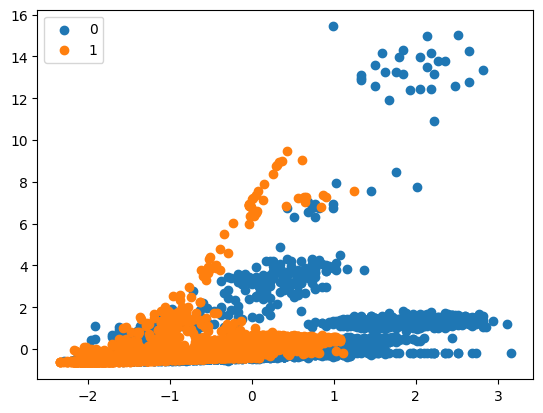

CPU times: total: 1.38 s
Wall time: 397 ms


In [93]:
%time X_train1, X_test1, y_train1, y_test1 = SMOTE()
%time X_train4, X_test4, y_train4, y_test4 = ADASYN()

In [94]:
def Models(models, X_train, X_test, y_train, y_test, title, graph):
    np.random.seed(42)
    model = models
    model.fit(X_train,y_train)
    
    X, y = Definedata()
    train_matrix = pd.crosstab(y_train, model.predict(X_train), rownames=['Actual'], colnames=['Predicted'])    
    test_matrix = pd.crosstab(y_test, model.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
    matrix = pd.crosstab(y, model.predict(X), rownames=['Actual'], colnames=['Predicted'])
    y_pred = model.predict(X_test)
    
    if graph:
        f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True, figsize=(15, 2))
    
        g1 = sns.heatmap(train_matrix, annot=True, fmt=".1f", cbar=False,annot_kws={"size": 18},ax=ax1)
        g1.set_title(title)
        g1.set_ylabel('Total Churn = {}'.format(y_train.sum()), fontsize=14, rotation=90)
        g1.set_xlabel('Accuracy score (TrainSet): {}'.format(accuracy_score(model.predict(X_train), y_train)))
        g1.set_xticklabels(['Churn','Not Churn'],fontsize=12)

        g2 = sns.heatmap(test_matrix, annot=True, fmt=".1f",cbar=False,annot_kws={"size": 18},ax=ax2)
        g2.set_title(title)
        g2.set_ylabel('Total Churn = {}'.format(y_test.sum()), fontsize=14, rotation=90)
        g2.set_xlabel('Accuracy score (TestSet): {}'.format(accuracy_score(model.predict(X_test), y_test)))
        g2.set_xticklabels(['Churn','Not Churn'],fontsize=12)

        g3 = sns.heatmap(matrix, annot=True, fmt=".1f",cbar=False,annot_kws={"size": 18},ax=ax3)
        g3.set_title(title)
        g3.set_ylabel('Total Churn = {}'.format(y.sum()), fontsize=14, rotation=90)
        g3.set_xlabel('Accuracy score (Total): {}'.format(accuracy_score(model.predict(X), y)))
        g3.set_xticklabels(['Churn','Not Churn'],fontsize=12)

        plt.show()

    print("\t\tError Table")
    print('Accuracy on Traing set   : ', model.score(X_train,y_train))
    print('Accuracy on Testing set  : ', model.score(X_test,y_test))
    print("Balanced accuracy score  : ", balanced_accuracy_score(y_test,y_pred))
    print('Overall Accuracy_Score   :',accuracy_score(y, model.predict(X))*100,'%')
    print('Recall ratio             :',metrics.recall_score(y, model.predict(X))*100,'%')
    print('AUC score                :', roc_auc_score(y, model.predict(X))*100,'%')
    

    return y, model.predict(X)

C:\Users\QB183AP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


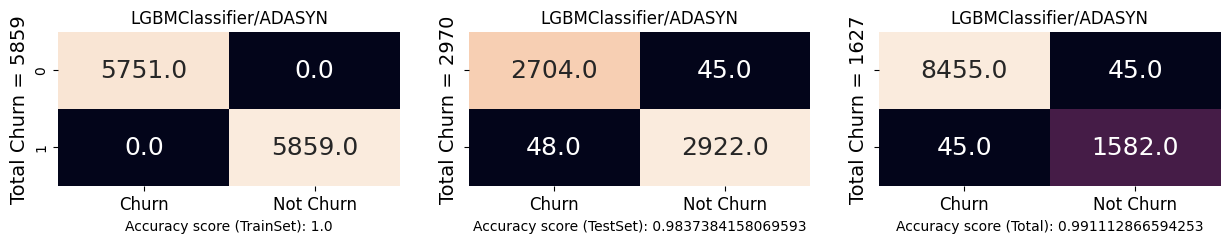

		Error Table
Accuracy on Traing set   :  1.0
Accuracy on Testing set  :  0.9837384158069593
Balanced accuracy score  :  0.9837343974484754
Overall Accuracy_Score   : 99.1112866594253 %
Recall ratio             : 97.2341733251383 %
AUC score                : 98.35238078021621 %
CPU times: total: 52.6 s
Wall time: 6.06 s


(array([0, 1, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 1, 0, ..., 0, 0, 0], dtype=int64))

In [95]:
title = 'LGBMClassifier/ADASYN'
%time Models(LGBMClassifier(max_depth=-1, random_state=310, silent=True, metric='None', n_jobs=15, n_estimators=2000),X_train4, X_test4, y_train4, y_test4, title, True)

C:\Users\QB183AP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


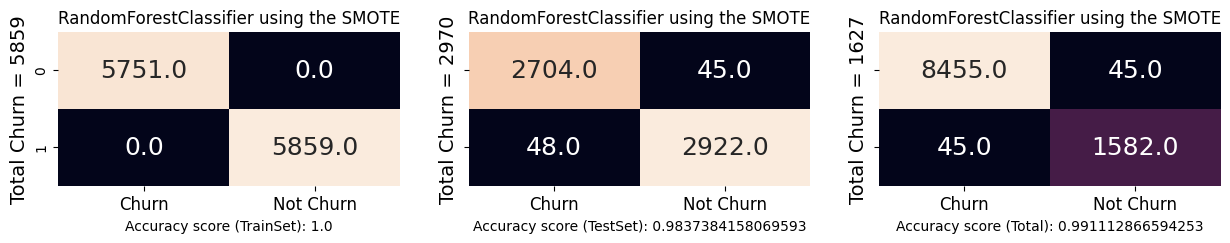

		Error Table
Accuracy on Traing set   :  1.0
Accuracy on Testing set  :  0.9837384158069593
Balanced accuracy score  :  0.9837343974484754
Overall Accuracy_Score   : 99.1112866594253 %
Recall ratio             : 97.2341733251383 %
AUC score                : 98.35238078021621 %


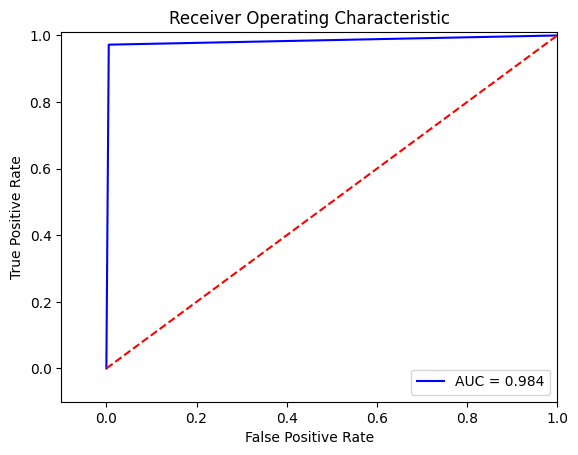

In [96]:
from sklearn.metrics import confusion_matrix,auc,roc_curve
np.random.seed(42)
title = 'RandomForestClassifier using the SMOTE'
y, ypred =  Models(LGBMClassifier(max_depth=-1, random_state=310, silent=True, metric='None', n_jobs=15, n_estimators=2000),X_train4, X_test4, y_train4, y_test4, title, True)

fpr, tpr, thresholds = roc_curve(y, ypred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [97]:
ypred=pd.DataFrame(ypred)
y=pd.DataFrame(y)


In [98]:
ypred[0].value_counts()

0    8500
1    1627
Name: 0, dtype: int64

In [99]:
y[0].value_counts()

0    8500
1    1627
Name: 0, dtype: int64

In [100]:
df.head()

,customer_age,customer_sex,customer_number_of_dependents,customer_education,customer_civil_status,customer_salary_range,customer_relationship_length,customer_available_credit_limit,credit_card_classification,total_products,period_inactive,contacts_in_last_year,credit_card_debt_balance,remaining_credit_limit,transaction_amount_ratio,total_transaction_amount,total_transaction_count,transaction_count_ratio,average_utilization,account_status
0,38.00,F,2,High School,Married,40-60K,31,1593.00,Blue,4,2,4,1091,502.00,0.87,4136.00,67,0.72,0.69,open
1,46.00,F,2,Graduate,Unknown,below 40K,40,6568.00,Blue,5,2,2,0,6568.00,0.10,1507.00,33,0.22,0.00,closed
2,43.00,M,1,High School,Married,80-120K,30,34516.00,Silver,1,1,3,2045,32471.00,0.59,4081.00,54,0.42,0.06,open
3,46.00,F,4,High School,Married,below 40K,36,2374.00,Blue,5,2,1,1332,1042.00,0.69,4253.00,81,0.88,0.56,open
4,40.00,M,4,High School,Single,80-120K,29,12978.00,Blue,3,3,2,0,12978.00,0.63,14134.00,85,0.70,0.00,open


In [101]:
concatenated_df = pd.concat([df, ypred], axis=1)

In [102]:
concatenated_df[(concatenated_df[0]==1)]

,customer_age,customer_sex,customer_number_of_dependents,customer_education,customer_civil_status,customer_salary_range,customer_relationship_length,customer_available_credit_limit,credit_card_classification,total_products,period_inactive,contacts_in_last_year,credit_card_debt_balance,remaining_credit_limit,transaction_amount_ratio,total_transaction_amount,total_transaction_count,transaction_count_ratio,average_utilization,account_status,0
1,46.00,F,2,Graduate,Unknown,below 40K,40,6568.00,Blue,5,2,2,0,6568.00,0.10,1507.00,33,0.22,0.00,closed,1
13,48.00,M,4,Unknown,Married,80-120K,36,22917.00,Blue,2,3,2,0,22917.00,0.57,2045.00,45,0.50,0.00,closed,1
23,58.00,F,1,Unknown,Single,below 40K,50,8513.00,Blue,5,2,2,799,7714.00,0.45,2119.00,37,0.54,0.09,closed,1
28,55.00,M,3,Doctorate,Single,80-120K,35,20865.00,Blue,4,1,3,0,20865.00,0.88,837.00,25,3.33,0.00,closed,1
31,43.00,F,3,High School,Divorced,below 40K,24,1662.00,Blue,4,2,2,613,1049.00,0.87,2326.00,31,0.55,0.37,closed,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10088,45.00,M,3,High School,Unknown,80-120K,36,3845.00,Blue,4,3,2,0,3845.00,0.59,2174.00,39,0.39,0.00,closed,1
10089,33.00,F,0,College,Single,Unknown,15,2299.00,Blue,3,1,4,0,2299.00,0.66,2323.00,47,0.47,0.00,closed,1
10096,30.00,F,1,College,Single,below 40K,36,4541.00,Blue,4,3,6,0,4541.00,0.98,7996.00,80,0.78,0.00,closed,1
10097,53.00,M,4,Unknown,Single,120K and more,48,34516.00,Blue,3,3,4,278,34238.00,0.82,3029.00,49,0.40,0.01,closed,1


Predict the test dataset

In [103]:
df_test = pd.read_csv(r"C:\Users\QB183AP\OneDrive - EY\Documents\Machine Learning\client_attrition_test.csv")
print(df_test.shape)
df_test.head(20)

(5063, 20)


,customer_id,customer_age,customer_sex,customer_number_of_dependents,customer_education,customer_civil_status,customer_salary_range,customer_relationship_length,customer_available_credit_limit,credit_card_classification,total_products,period_inactive,contacts_in_last_year,credit_card_debt_balance,remaining_credit_limit,transaction_amount_ratio,total_transaction_amount,total_transaction_count,transaction_count_ratio,average_utilization
0,699849,45.00,M,2,College,Married,Unknown,39,32305.28,Blue,1,2,1,1616,30689.22,0.73,7129.00,84,0.62,0.05
1,268360,49.00,M,2,High School,Married,60-80K,39,6034.22,Blue,4,1,2,472,5562.15,0.60,2449.00,54,0.76,0.05
2,274908,52.00,F,2,Uneducated,Married,below 40K,35,1922.82,Blue,2,1,2,1003,919.28,0.71,33472.00,77,0.85,0.53
3,877343,44.00,F,1,Graduate,Married,below 40K,39,3117.46,Blue,6,1,2,1385,1732.41,0.71,4606.00,77,0.54,0.47
4,634148,47.00,M,2,Graduate,Married,below 40K,30,23466.76,Blue,6,2,2,1692,21773.90,0.74,3603.00,71,0.74,0.07
5,277346,51.00,F,1,Graduate,Single,below 40K,44,2820.22,Blue,5,1,3,316,2503.88,0.82,2461.00,42,0.63,0.11
6,159337,46.00,M,4,Unknown,Single,40-60K,36,8447.61,Blue,5,2,0,1189,7257.86,0.77,4317.00,75,0.86,0.14
7,680814,63.00,M,1,Graduate,Married,60-80K,45,2116.27,Blue,3,2,2,180,1935.74,0.88,3826.00,58,0.65,0.02
8,476166,58.00,F,0,Unknown,Married,40-60K,43,1720.68,Blue,2,3,3,729,990.93,0.80,2367.00,48,0.55,0.42
9,859216,42.00,M,2,Unknown,Married,40-60K,33,1444.80,Blue,3,3,2,0,1444.80,0.67,2574.00,45,0.68,0.00


In [104]:
df_test.isnull().sum()

customer_id                          0
customer_age                       294
customer_sex                       472
customer_number_of_dependents        0
customer_education                   0
customer_civil_status                0
customer_salary_range              331
customer_relationship_length         0
customer_available_credit_limit      0
credit_card_classification           0
total_products                       0
period_inactive                      0
contacts_in_last_year                0
credit_card_debt_balance             0
remaining_credit_limit               0
transaction_amount_ratio             0
total_transaction_amount           186
total_transaction_count              0
transaction_count_ratio              0
average_utilization                  0
dtype: int64

In [105]:
missing_percentages = df_test.isnull().sum()/len(df_test)
missing_percentages[missing_percentages>0]

customer_age               0.06
customer_sex               0.09
customer_salary_range      0.07
total_transaction_amount   0.04
dtype: float64

In [106]:
df_test["customer_sex"] = df_test["customer_sex"].fillna(df_test["customer_sex"].mode().iloc[0])
df_test["customer_salary_range"] = df_test["customer_salary_range"].fillna(df_test["customer_salary_range"].mode().iloc[0])
df_test["customer_age"] = df_test["customer_age"].fillna(df_test["customer_age"].mean())
df_test["total_transaction_amount"] = df_test["total_transaction_amount"].fillna(df_test["total_transaction_amount"].median())

In [107]:
columns_to_encode = ['customer_sex', 'customer_education', 'customer_civil_status', 'customer_salary_range', 'credit_card_classification']

for i in columns_to_encode:
    print(df_test[i].value_counts())

F    3261
M    1802
Name: customer_sex, dtype: int64
Graduate         2066
High School      1016
Uneducated        684
Unknown           676
College           406
Post-Graduate     123
Doctorate          92
Name: customer_education, dtype: int64
Married     2757
Single      2091
Unknown      109
Divorced     106
Name: customer_civil_status, dtype: int64
below 40K        2808
40-60K            759
80-120K           541
60-80K            485
Unknown           327
120K and more     143
Name: customer_salary_range, dtype: int64
Blue      5030
Silver      32
Gold         1
Name: credit_card_classification, dtype: int64


In [108]:
dftest_ohe = pd.get_dummies(df_test, columns=columns_to_encode, drop_first=True)

# Print the encoded dataframe
dftest_ohe.head()

,customer_id,customer_age,customer_number_of_dependents,customer_relationship_length,customer_available_credit_limit,total_products,period_inactive,contacts_in_last_year,credit_card_debt_balance,remaining_credit_limit,transaction_amount_ratio,total_transaction_amount,total_transaction_count,transaction_count_ratio,average_utilization,customer_sex_M,customer_education_Doctorate,customer_education_Graduate,customer_education_High School,customer_education_Post-Graduate,customer_education_Uneducated,customer_education_Unknown,customer_civil_status_Married,customer_civil_status_Single,customer_civil_status_Unknown,customer_salary_range_40-60K,customer_salary_range_60-80K,customer_salary_range_80-120K,customer_salary_range_Unknown,customer_salary_range_below 40K,credit_card_classification_Gold,credit_card_classification_Silver
0,699849,45.00,2,39,32305.28,1,2,1,1616,30689.22,0.73,7129.00,84,0.62,0.05,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,268360,49.00,2,39,6034.22,4,1,2,472,5562.15,0.60,2449.00,54,0.76,0.05,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
2,274908,52.00,2,35,1922.82,2,1,2,1003,919.28,0.71,33472.00,77,0.85,0.53,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
3,877343,44.00,1,39,3117.46,6,1,2,1385,1732.41,0.71,4606.00,77,0.54,0.47,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,634148,47.00,2,30,23466.76,6,2,2,1692,21773.90,0.74,3603.00,71,0.74,0.07,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [109]:
columns_to_scale = ['customer_age', 'customer_number_of_dependents', 'customer_relationship_length', 'customer_available_credit_limit', 'credit_card_debt_balance', 'remaining_credit_limit',
                     'total_transaction_amount', 'total_transaction_count', 'average_utilization', 'period_inactive', 'contacts_in_last_year']
df_test1= dftest_ohe.copy()
 
# Create a scaler object
scaler = StandardScaler()

# Perform feature scaling
df_scaled = pd.DataFrame(scaler.fit_transform(df_test1[columns_to_scale]), columns=columns_to_scale)

# Replace the scaled columns in the original dataframe
df_test1[columns_to_scale] = df_scaled

# Print the scaled dataframe
df_test1.head()

,customer_id,customer_age,customer_number_of_dependents,customer_relationship_length,customer_available_credit_limit,total_products,period_inactive,contacts_in_last_year,credit_card_debt_balance,remaining_credit_limit,transaction_amount_ratio,total_transaction_amount,total_transaction_count,transaction_count_ratio,average_utilization,customer_sex_M,customer_education_Doctorate,customer_education_Graduate,customer_education_High School,customer_education_Post-Graduate,customer_education_Uneducated,customer_education_Unknown,customer_civil_status_Married,customer_civil_status_Single,customer_civil_status_Unknown,customer_salary_range_40-60K,customer_salary_range_60-80K,customer_salary_range_80-120K,customer_salary_range_Unknown,customer_salary_range_below 40K,credit_card_classification_Gold,credit_card_classification_Silver
0,699849,-0.16,0.05,0.51,1.40,1,0.01,-1.19,0.67,3.11,0.73,0.31,1.05,0.62,-0.96,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,268360,0.47,0.05,0.51,-0.20,4,-1.22,-0.10,-1.01,-0.17,0.60,-0.41,-0.50,0.76,-0.97,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
2,274908,0.95,0.05,-0.09,-0.46,2,-1.22,-0.10,-0.23,-0.77,0.71,4.41,0.69,0.85,1.05,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
3,877343,-0.31,-0.90,0.51,-0.38,6,-1.22,-0.10,0.33,-0.66,0.71,-0.08,0.69,0.54,0.80,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,634148,0.16,0.05,-0.84,0.86,6,0.01,-0.10,0.78,1.95,0.74,-0.23,0.38,0.74,-0.88,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [113]:
test_pred=df_test1.copy()
test_pred=test_pred[['total_transaction_count', 'total_transaction_amount', 'credit_card_debt_balance', 'transaction_count_ratio', 'average_utilization', 'transaction_amount_ratio',
      'total_products', 'remaining_credit_limit', 'customer_available_credit_limit', 'contacts_in_last_year', 'customer_age', 'period_inactive', 'customer_relationship_length', 'customer_number_of_dependents', 
     'customer_sex_M', 'customer_civil_status_Married', 'customer_civil_status_Single', 'customer_salary_range_below 40K']]

In [115]:
model.predict(test_pred)

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)